<a href="https://colab.research.google.com/github/JGillette71/BERT-Inferred_Minor_Status/blob/main/bert_inferred_minor_status_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
**Inferrence of Minor Status for Data Protections** \
Initial BERT based approach v1 \
NER - Token-level Classification \
Jason Gillette 

**Fine-tuning Data**\
Global Giving Storytelling Project \
*57,220 stories collected in Uganda and Kenya*\
Source: marcmaxmeister, data.world \
https://data.world/marcmaxmeister/globalgiving-storytelling-project/workspace/file?filename=storytelling-project-feb-2013.csv \
Annotator: Jason Gillette \
IOB Labels \
Classes:
- ADULT
- MINOR
- ~~LOCATION~~
- ~~ORGANIZATION~~ 
- ~~OTHER~~

### Data Processing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Read fine tuning data 
train_data = pd.read_excel('/content/drive/MyDrive/Grad School Projects /training_data_v3.xlsx')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentence_list  2027 non-null   object
 1   label_list     2027 non-null   object
dtypes: object(2)
memory usage: 31.8+ KB


In [ ]:
# Read testing data (non augmented sequences)
test_data = pd.read_excel('/content/drive/MyDrive/Grad School Projects /testing_data_v3.xlsx')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sentence_list  507 non-null    object
 1   label_list     507 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [ ]:
# check for nans 
train_data.isnull().sum()

sentence_list    0
label_list       0
dtype: int64

In [ ]:
# check for duplicates in augmented sequences 
train_data['sentence_list'].duplicated().sum()

0

### Data Analysis

In [ ]:
train_data.head()

,sentence_list,label_list
0,Stealing is the taking of someone 's property ...,"O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,..."
1,Kanyeki was a student at Olkesuke primary scho...,"B-MINR,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O,O..."
2,There was a boy living up country by a name ca...,"O,O,O,O,O,O,O,O,O,O,O,B-MINR,I-MINR,O,O,O,O,O,..."
3,I am Petronila Wilunda . I am currently on a b...,"O,O,B-MINR,I-MINR,O,O,O,O,O,O,O,O,O,O,O,O,O,O,..."
4,"My name is Jane Wilunda , from Kakamega North ...","O,O,O,B-MINR,I-MINR,O,O,O,O,O,O,O,O,O,O,O,O,O,..."


O         475825
B-MINR      5951
B-ADLT      4871
I-ADLT      1537
I-MINR       831
dtype: int64


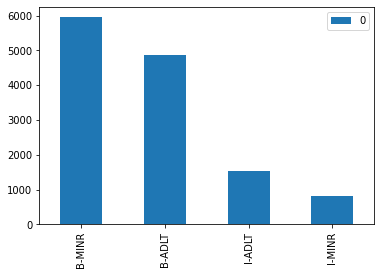

In [ ]:
# instances of each entity class in training data

# convert to list
train_data['label_list'] = train_data['label_list'].apply(lambda x: list(x.split(',')))

# perform count of entity instances
entity_counts = pd.Series([x for item in train_data['label_list'] for x in item]).value_counts()
print(entity_counts)

# plot entity counts
entity_count_df = entity_counts.to_frame()
entity_count_df.drop(labels='O', axis=0, inplace=True)
entity_count_df.plot(kind='bar')

O         105302
B-MINR      1733
B-ADLT       739
I-ADLT       290
I-MINR       255
dtype: int64


str

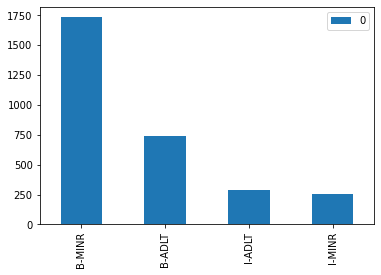

In [ ]:
# instances of each entity class in test data

# convert to list
test_data['label_list'] = test_data['label_list'].apply(lambda x: list(x.split(',')))

# perform count of entity instances
entity_counts_test = pd.Series([x for item in test_data['label_list'] for x in item]).value_counts()
print(entity_counts_test)

# plot entity counts
entity_count_test_df = entity_counts_test.to_frame()
entity_count_test_df.drop(labels='O', axis=0, inplace=True)
entity_count_test_df.plot(kind='bar')

# convert back to string type for data loader
test_data['label_list'] = test_data['label_list'].apply(lambda x: ','.join(x))
type(test_data['label_list'][0])

In [ ]:
# inspect random sequence and coresponding label 
rand_num = np.random.randint(low = 0, high = len(train_data))
print(train_data.label_list[rand_num])
print(train_data.sentence_list[rand_num])
print(f'length of random label: {len(train_data.label_list[rand_num])}')
print(f'length of sequence: {len(train_data.sentence_list[rand_num]. split())}')

['O', 'O', 'O', 'O', 'O', 'O', 'B-ADLT', 'I-ADLT', 'I-ADLT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ADLT', 'I-ADLT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

In [ ]:
# length of token sequences (word level not word piece)
seq_lenghts = pd.Series([len(x) for x in train_data['label_list']], index=train_data.index)
print(seq_lenghts.describe())

count    2027.000000
mean      241.250617
std       603.383229
min        36.000000
25%        95.000000
50%       119.000000
75%       161.000000
max      7762.000000
dtype: float64


In [ ]:
# reuse for dict of entity labels for use in dataloader 
entity_count_temp = entity_counts.to_frame()

# dictionaries for label indicies
label2id = {k: v for v, k in enumerate(entity_count_temp.index.unique())}
id2label = {v: k for v, k in enumerate(entity_count_temp.index.unique())}
print(label2id)
print(id2label)

{'O': 0, 'B-MINR': 1, 'B-ADLT': 2, 'I-ADLT': 3, 'I-MINR': 4}
{0: 'O', 1: 'B-MINR', 2: 'B-ADLT', 3: 'I-ADLT', 4: 'I-MINR'}


In [ ]:
# convert back to string type for data loader
train_data['label_list'] = train_data['label_list'].apply(lambda x: ','.join(x))
type(train_data['label_list'][0])

str

### BERT based NER Implimentation 
Lessons drawn from:
* Original BERT [paper](https://arxiv.org/abs/1810.04805)
* Fine-tuning with BERT [Tutorial](https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/BERT/Custom_Named_Entity_Recognition_with_BERT_only_first_wordpiece.ipynb#scrollTo=MyETdB-dkBsX)
<br>

Contents:
- Environment Set-up
  - [x] Enable GPU Hardware Accelerator in Runtime Settings
  - [x] Install and Import transformers
  - [x] Install and Import seqeval
  - [x] Import sklearn
  - [x] Import pytorch

In [ ]:
# install transformers and seqeval 
!pip install transformers seqeval[gpu]

     |████████████████████████████████| 4.2 MB 29.9 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 6.6 MB 54.9 MB/s 
     |████████████████████████████████| 596 kB 32.7 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=cd73acba9b8c871d769f9610bc57fe24bbf0597427c2dfeb1be72db8be80edbb
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# imports 
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import torch
from torch import cuda 
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, BertTokenizerFast, BertConfig, BertForTokenClassification

In [ ]:
# check if GPU is enabled; if gpu enabled, will print cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
MAX_LEN = 256 # aligned to mean token length 
TRAIN_BATCH_SIZE = 4
VALID_BATCH_SIZE = 2
EPOCHS = 3
LEARNING_RATE = 3e-05
MAX_GRAD_NORM = 10
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
def tokenize_and_preserve_labels(sentence, text_labels, tokenizer):
    """
    Word piece tokenization makes it difficult to match word labels
    back up with individual word pieces. This function tokenizes each
    word one at a time so that it is easier to preserve the correct
    label for each subword. It is, of course, a bit slower in processing
    time, but it will help our model achieve higher accuracy.
    """

    tokenized_sentence = []
    labels = []

    sentence = sentence.strip()

    for word, label in zip(sentence.split(), text_labels.split(",")):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

In [ ]:
class dataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __getitem__(self, index):
        # step 1: tokenize (and adapt corresponding labels)
        sentence = self.data.sentence_list[index]  
        word_labels = self.data.label_list[index]  
        tokenized_sentence, labels = tokenize_and_preserve_labels(sentence, word_labels, self.tokenizer)
        
        # step 2: add special tokens (and corresponding labels)
        tokenized_sentence = ["[CLS]"] + tokenized_sentence + ["[SEP]"] # add special tokens
        labels.insert(0, "O") # add outside label for [CLS] token
        labels.insert(-1, "O") # add outside label for [SEP] token

        # step 3: truncating/padding
        maxlen = self.max_len

        if (len(tokenized_sentence) > maxlen):
          # truncate
          tokenized_sentence = tokenized_sentence[:maxlen]
          labels = labels[:maxlen]
        else:
          # pad
          tokenized_sentence = tokenized_sentence + ['[PAD]'for _ in range(maxlen - len(tokenized_sentence))]
          labels = labels + ["O" for _ in range(maxlen - len(labels))]

        # step 4: obtain the attention mask
        attn_mask = [1 if tok != '[PAD]' else 0 for tok in tokenized_sentence]
        
        # step 5: convert tokens to input ids
        ids = self.tokenizer.convert_tokens_to_ids(tokenized_sentence)

        label_ids = [label2id[label] for label in labels]
        # the following line is deprecated
        #label_ids = [label if label != 0 else -100 for label in label_ids]
        
        return {
              'ids': torch.tensor(ids, dtype=torch.long),
              'mask': torch.tensor(attn_mask, dtype=torch.long),
              #'token_type_ids': torch.tensor(token_ids, dtype=torch.long),
              'targets': torch.tensor(label_ids, dtype=torch.long)
        } 
    
    def __len__(self):
        return self.len

In [ ]:
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = dataset(train_data, tokenizer, MAX_LEN)
testing_set = dataset(test_data, tokenizer, MAX_LEN)

TRAIN Dataset: (2027, 2)
TEST Dataset: (507, 2)


In [ ]:
# visual check of data structure
training_set[0]

{'ids': tensor([  101, 11065,  2003,  1996,  2635,  1997,  2619,  1005,  1055,  3200,
          2043,  2002,  2030,  2016,  2003,  2025,  2105,  2030,  5204,  1012,
         11065,  5260,  2000,  1996,  2331,  1997,  2116,  2111,  2138,  2043,
         15862,  2024,  3236,  2027,  2024, 11060,  2030,  2962,  2094,  2000,
          2331,  2011,  1996, 11240,  1012,  2043,  1045,  2001,  1999,  2465,
          2809,  1045,  2018,  1037,  2767,  1997,  3067,  2124,  2004, 27005,
          2721,  1012, 27005,  2721,  2001,  1996,  2465, 12383,  2021,  6343,
          2354,  5987,  2033,  1012,  1045,  2699,  2000,  5009,  2032,  1998,
          2002,  4188,  1998,  2506,  2007,  2010,  3679,  4023,  1012, 27005,
          2721,  2506,  2007,  2010,  2919,  2476,  1998,  2085,  2002,  2052,
          2130, 23365,  7070,  5350,  2013, 12358,  1998,  2448,  2185,  1012,
          2028,  2154,  2043,  2057,  2020,  2183,  2188,  2013,  2082, 27005,
          2721,  2387,  2019,  2214,  2450,  

In [ ]:
# visual check of token alignment 
for token, label in zip(tokenizer.convert_ids_to_tokens(training_set[0]["ids"]), training_set[0]["targets"]):
  print('{0:10}  {1}'.format(token, label))

[CLS]       0
stealing    0
is          0
the         0
taking      0
of          0
someone     0
'           0
s           0
property    0
when        0
he          0
or          0
she         0
is          0
not         0
around      0
or          0
aware       0
.           0
stealing    0
leads       0
to          0
the         0
death       0
of          0
many        0
people      0
because     0
when        0
thieves     0
are         0
caught      0
they        0
are         0
burnt       0
or          0
stone       0
##d         0
to          0
death       0
by          0
the         0
mob         0
.           0
when        0
i           0
was         0
in          0
class       0
eight       0
i           0
had         0
a           0
friend      0
of          0
mine        0
known       0
as          0
kia         1
##la        1
.           0
kia         1
##la        1
was         0
the         0
class       0
thief       0
but         0
nobody      0
knew        0
expect

In [ ]:
# visual check of token alignment 
for token, label in zip(tokenizer.convert_ids_to_tokens(training_set[10]["ids"]), training_set[10]["targets"]):
  print('{0:10}  {1}'.format(token, label))

[CLS]       0
mary        1
is          0
an          0
orphan      0
in          0
sit         0
##at        0
##ung       0
.           0
she         0
is          0
the         0
first       0
born        0
in          0
the         0
family      0
of          0
six         0
.           0
one         0
day         0
as          0
she         0
was         0
reading     0
a           0
story       0
##book      0
she         0
had         0
a           0
thought     0
.           0
the         0
next        0
morning     0
she         0
woke        0
up          0
and         0
started     0
of          0
to          0
kit         0
##ale       0
town        0
to          0
look        0
for         0
work        0
so          0
that        0
she         0
can         0
be          0
able        0
to          0
feed        0
her         0
young       0
ones        0
.           0
luckily     0
she         0
found       0
some        0
work        0
in          0
a           0
big   

In [ ]:
# set parameters 
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
# define the model / specify len classification labels 
model = BertForTokenClassification.from_pretrained('bert-base-uncased', 
                                                   num_labels=len(id2label),
                                                   id2label=id2label,
                                                   label2id=label2id)

# put model on GPU
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
# The initial loss of your model should be close to -ln(1/number of classes) = -ln(1/7) = 1.95
ids = training_set[0]["ids"].unsqueeze(0)
mask = training_set[0]["mask"].unsqueeze(0)
targets = training_set[0]["targets"].unsqueeze(0)

ids = ids.to(device)
mask = mask.to(device)
targets = targets.to(device)

outputs = model(input_ids=ids, attention_mask=mask, labels=targets)
initial_loss = outputs[0]
initial_loss

tensor(1.6805, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
# Verify logits have shape (batch_size, squence_length, number of labels)
tr_logits = outputs[1]
tr_logits.shape

torch.Size([1, 256, 5])

In [ ]:
# define the optimizer 
optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 3e-05
    maximize: False
    weight_decay: 0
)

In [ ]:
# Defining the training function on the 80% of the dataset for tuning the bert model
def train(epoch):
    tr_loss, tr_accuracy = 0, 0
    nb_tr_examples, nb_tr_steps = 0, 0
    tr_preds, tr_labels = [], []
    # put model in training mode
    model.train()
    
    for idx, batch in enumerate(training_loader):
        
        ids = batch['ids'].to(device, dtype = torch.long)
        mask = batch['mask'].to(device, dtype = torch.long)
        targets = batch['targets'].to(device, dtype = torch.long)

        outputs = model(input_ids=ids, attention_mask=mask, labels=targets)
        loss, tr_logits = outputs.loss, outputs.logits
        tr_loss += loss.item()

        nb_tr_steps += 1
        nb_tr_examples += targets.size(0)
        
        if idx % 100==0:
            loss_step = tr_loss/nb_tr_steps
            print(f"Training loss per 100 training steps: {loss_step}")
           
        # compute training accuracy
        flattened_targets = targets.view(-1) # shape (batch_size * seq_len,)
        active_logits = tr_logits.view(-1, model.num_labels) # shape (batch_size * seq_len, num_labels)
        flattened_predictions = torch.argmax(active_logits, axis=1) # shape (batch_size * seq_len,)
        # now, use mask to determine where we should compare predictions with targets (includes [CLS] and [SEP] token predictions)
        active_accuracy = mask.view(-1) == 1 # active accuracy is also of shape (batch_size * seq_len,)
        targets = torch.masked_select(flattened_targets, active_accuracy)
        predictions = torch.masked_select(flattened_predictions, active_accuracy)
        
        tr_preds.extend(predictions)
        tr_labels.extend(targets)
        
        tmp_tr_accuracy = accuracy_score(targets.cpu().numpy(), predictions.cpu().numpy())
        tr_accuracy += tmp_tr_accuracy
    
        # gradient clipping
        torch.nn.utils.clip_grad_norm_(
            parameters=model.parameters(), max_norm=MAX_GRAD_NORM
        )
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_loss = tr_loss / nb_tr_steps
    tr_accuracy = tr_accuracy / nb_tr_steps
    print(f"Training loss epoch: {epoch_loss}")
    print(f"Training accuracy epoch: {tr_accuracy}")

In [ ]:
for epoch in range(EPOCHS):
    print(f"Training epoch: {epoch + 1}")
    train(epoch)

Training epoch: 1
Training loss per 100 training steps: 1.7621229887008667
Training loss per 100 training steps: 0.14463643392197567
Training loss per 100 training steps: 0.08687302605967172
Training loss per 100 training steps: 0.0651448158766963
Training loss per 100 training steps: 0.05289600245588392
Training loss per 100 training steps: 0.04647667974511537
Training loss epoch: 0.046083776701629324
Training accuracy epoch: 0.9799285689557762
Training epoch: 2
Training loss per 100 training steps: 0.006872127763926983
Training loss per 100 training steps: 0.009146805466521569
Training loss per 100 training steps: 0.009071959448753582
Training loss per 100 training steps: 0.00861123775691258
Training loss per 100 training steps: 0.008062904252902375
Training loss per 100 training steps: 0.007428634759634008
Training loss epoch: 0.007404074054411144
Training accuracy epoch: 0.9960830881437228
Training epoch: 3
Training loss per 100 training steps: 0.0006563329370692372
Training loss p

In [ ]:
def valid(model, testing_loader):
    # put model in evaluation mode
    model.eval()
    
    eval_loss, eval_accuracy = 0, 0
    nb_eval_examples, nb_eval_steps = 0, 0
    eval_preds, eval_labels = [], []
    
    with torch.no_grad():
        for idx, batch in enumerate(testing_loader):
            
            ids = batch['ids'].to(device, dtype = torch.long)
            mask = batch['mask'].to(device, dtype = torch.long)
            targets = batch['targets'].to(device, dtype = torch.long)
            
            outputs = model(input_ids=ids, attention_mask=mask, labels=targets)
            loss, eval_logits = outputs.loss, outputs.logits
            
            eval_loss += loss.item()

            nb_eval_steps += 1
            nb_eval_examples += targets.size(0)
        
            if idx % 100==0:
                loss_step = eval_loss/nb_eval_steps
                print(f"Validation loss per 100 evaluation steps: {loss_step}")
              
            # compute evaluation accuracy
            flattened_targets = targets.view(-1) # shape (batch_size * seq_len,)
            active_logits = eval_logits.view(-1, model.num_labels) # shape (batch_size * seq_len, num_labels)
            flattened_predictions = torch.argmax(active_logits, axis=1) # shape (batch_size * seq_len,)
            # now, use mask to determine where we should compare predictions with targets (includes [CLS] and [SEP] token predictions)
            active_accuracy = mask.view(-1) == 1 # active accuracy is also of shape (batch_size * seq_len,)
            targets = torch.masked_select(flattened_targets, active_accuracy)
            predictions = torch.masked_select(flattened_predictions, active_accuracy)
            
            eval_labels.extend(targets)
            eval_preds.extend(predictions)
            
            tmp_eval_accuracy = accuracy_score(targets.cpu().numpy(), predictions.cpu().numpy())
            eval_accuracy += tmp_eval_accuracy
    
    #print(eval_labels)
    #print(eval_preds)

    labels = [id2label[id.item()] for id in eval_labels]
    predictions = [id2label[id.item()] for id in eval_preds]

    #print(labels)
    #print(predictions)
    
    eval_loss = eval_loss / nb_eval_steps
    eval_accuracy = eval_accuracy / nb_eval_steps
    print(f"Validation Loss: {eval_loss}")
    print(f"Validation Accuracy: {eval_accuracy}")

    return labels, predictions

In [ ]:
labels, predictions = valid(model, testing_loader)

Validation loss per 100 evaluation steps: 0.0032085890416055918
Validation loss per 100 evaluation steps: 0.01896285676177808
Validation loss per 100 evaluation steps: 0.018494474684316562
Validation Loss: 0.019443831580154107
Validation Accuracy: 0.9927360505975156


### Evaluation Results

In [ ]:
from seqeval.metrics import classification_report

print(classification_report([labels], [predictions]))

              precision    recall  f1-score   support

        ADLT       0.52      0.71      0.60       397
        MINR       0.91      0.88      0.89      1753

   micro avg       0.81      0.85      0.83      2150
   macro avg       0.71      0.79      0.74      2150
weighted avg       0.84      0.85      0.84      2150



Testing data is not balanced to reflect real-world deployment.\
Why doesn't support match actual instances in test data? 
- MINR (1988) 
- ADLT (1029) 

In [ ]:
def performance_measure(y_true, y_pred):
    """
    Sourced from SeqEval source code 
    Compute the performance metrics: TP, FP, FN, TN
    Args:
        y_true : 2d array. Ground truth (correct) target values.
        y_pred : 2d array. Estimated targets as returned by a tagger.
    Returns:
        performance_dict : dict
    Example:
        >>> from seqeval.metrics import performance_measure
        >>> y_true = [['O', 'O', 'O', 'B-MISC', 'I-MISC', 'O', 'B-ORG'], ['B-PER', 'I-PER', 'O', 'B-PER']]
        >>> y_pred = [['O', 'O', 'B-MISC', 'I-MISC', 'I-MISC', 'O', 'O'], ['B-PER', 'I-PER', 'O', 'B-MISC']]
        >>> performance_measure(y_true, y_pred)
        {'TP': 3, 'FP': 3, 'FN': 1, 'TN': 4}
    """
    performance_dict = dict()
    if any(isinstance(s, list) for s in y_true):
        y_true = [item for sublist in y_true for item in sublist]
        y_pred = [item for sublist in y_pred for item in sublist]
    performance_dict['TP'] = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred)
                                 if ((y_t != 'O') or (y_p != 'O')))
    performance_dict['FP'] = sum(((y_t != y_p) and (y_p != 'O')) for y_t, y_p in zip(y_true, y_pred))
    performance_dict['FN'] = sum(((y_t != 'O') and (y_p == 'O'))
                                 for y_t, y_p in zip(y_true, y_pred))
    performance_dict['TN'] = sum((y_t == y_p == 'O')
                                 for y_t, y_p in zip(y_true, y_pred))

    return performance_dict

In [ ]:
# confusion matrix
cm_dict = performance_measure([labels], [predictions])
cm_dict

{'FN': 40, 'FP': 512, 'TN': 66342, 'TP': 2374}

In [ ]:
# calculate AUC of single threshold (single point)
sensitivity = cm_dict['TP'] / (cm_dict['TP'] + cm_dict['FN'])
specificity = cm_dict['TN'] / (cm_dict['TN'] + cm_dict['FP'])
T = sensitivity/2
U = specificity/2
AUC = T+U
print(AUC)

0.9878857560214374


In [ ]:
# multi-label confusion matrix
from sklearn.metrics import multilabel_confusion_matrix
y_true = np.array([[1, 0, 1, 0, 0],
                   [0, 1, 0, 1, 1],
                   [1, 1, 1, 0, 1]])
y_pred = np.array([[1, 0, 0, 0, 1],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 0, 0]])

multilabel_confusion_matrix(y_true, y_pred)

array([[[1, 0],
        [0, 2]],

       [[1, 0],
        [0, 2]],

       [[0, 1],
        [1, 1]],

       [[2, 0],
        [0, 1]],

       [[0, 1],
        [2, 0]]])

### Model Inference

In [ ]:
sentence = "Dallas man, Dr.Jose Doven, arrested on charges of fraud last Thursday. Subject's children, Anthony Doven (son) and Tabatha Jones (daughter) were found at their 123 Main St. home and were later turned over to state services. \
Tabatha is 10 years old has a history of juvenile diabetes and requires specialized care. Anthony is a new born and has a face only a mother can love. Upon hearing of his children's custody, Jose recanted his confession."

inputs = tokenizer(sentence, padding='max_length', truncation=True, max_length=MAX_LEN, return_tensors="pt")

# move to gpu
ids = inputs["input_ids"].to(device)
mask = inputs["attention_mask"].to(device)
# forward pass
outputs = model(ids, mask)
logits = outputs[0]

active_logits = logits.view(-1, model.num_labels) # shape (batch_size * seq_len, num_labels)
flattened_predictions = torch.argmax(active_logits, axis=1) # shape (batch_size*seq_len,) - predictions at the token level

tokens = tokenizer.convert_ids_to_tokens(ids.squeeze().tolist())
token_predictions = [id2label[i] for i in flattened_predictions.cpu().numpy()]
wp_preds = list(zip(tokens, token_predictions)) # list of tuples. Each tuple = (wordpiece, prediction)

word_level_predictions = []
for pair in wp_preds:
  if (pair[0].startswith(" ##")) or (pair[0] in ['[CLS]', '[SEP]', '[PAD]']):
    # skip prediction
    continue # this does not work 
  else:
    word_level_predictions.append(pair[1])

# we join tokens, if they are not special ones
str_rep = " ".join([t[0] for t in wp_preds if t[0] not in ['[CLS]', '[SEP]', '[PAD]']]).replace(" ##", "")
print(str_rep)
print(len(list(str_rep.split(' '))))
print(word_level_predictions)
print(len(word_level_predictions))

dallas man , dr . jose doven , arrested on charges of fraud last thursday . subject ' s children , anthony doven ( son ) and tabatha jones ( daughter ) were found at their 123 main st . home and were later turned over to state services . tabatha is 10 years old has a history of juvenile diabetes and requires specialized care . anthony is a new born and has a face only a mother can love . upon hearing of his children ' s custody , jose recanted his confession .
95
['O', 'O', 'O', 'O', 'O', 'B-ADLT', 'I-ADLT', 'I-ADLT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MINR', 'I-MINR', 'I-MINR', 'O', 'O', 'O', 'O', 'B-MINR', 'B-MINR', 'B-MINR', 'I-MINR', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MINR', 'B-MINR', 'B-MINR', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MINR', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '

extra labels vs tokens due to word piece level prediction

In [ ]:
wp_preds

[('[CLS]', 'O'),
 ('dallas', 'O'),
 ('man', 'O'),
 (',', 'O'),
 ('dr', 'O'),
 ('.', 'O'),
 ('jose', 'B-ADLT'),
 ('dove', 'I-ADLT'),
 ('##n', 'I-ADLT'),
 (',', 'O'),
 ('arrested', 'O'),
 ('on', 'O'),
 ('charges', 'O'),
 ('of', 'O'),
 ('fraud', 'O'),
 ('last', 'O'),
 ('thursday', 'O'),
 ('.', 'O'),
 ('subject', 'O'),
 ("'", 'O'),
 ('s', 'O'),
 ('children', 'O'),
 (',', 'O'),
 ('anthony', 'B-MINR'),
 ('dove', 'I-MINR'),
 ('##n', 'I-MINR'),
 ('(', 'O'),
 ('son', 'O'),
 (')', 'O'),
 ('and', 'O'),
 ('tab', 'B-MINR'),
 ('##ath', 'B-MINR'),
 ('##a', 'B-MINR'),
 ('jones', 'I-MINR'),
 ('(', 'O'),
 ('daughter', 'O'),
 (')', 'O'),
 ('were', 'O'),
 ('found', 'O'),
 ('at', 'O'),
 ('their', 'O'),
 ('123', 'O'),
 ('main', 'O'),
 ('st', 'O'),
 ('.', 'O'),
 ('home', 'O'),
 ('and', 'O'),
 ('were', 'O'),
 ('later', 'O'),
 ('turned', 'O'),
 ('over', 'O'),
 ('to', 'O'),
 ('state', 'O'),
 ('services', 'O'),
 ('.', 'O'),
 ('tab', 'B-MINR'),
 ('##ath', 'B-MINR'),
 ('##a', 'B-MINR'),
 ('is', 'O'),
 ('10', 'O'),

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ad1449ac-680d-09dd-e240-8509fae72610)
